# Polytope

This python notebook goes over various functionalities of `pycvxset` for manipulating and plotting polytopes.

We define a polytope as a $n$-dimensional convex and compact set characterized in one of the following ways:
1. **Halfspace representation (H-rep)**: The polytope $$\mathcal{P}=\{x\in\mathbb{R}^n|Ax \preceq b\}$$ is characterized by an appropriately defined tuple $(A,b)$ with $A\in\mathbb{R}^{N\times n}, b\in\mathbb{R}^{N}$.
2. **Vertex representation (V-rep)**: The polytope $$\mathcal{P}=\{x\in\mathbb{R}^n|\exists \theta\in\mathbb{R}^N, \theta \succeq 0, 1^\top \theta = 1, x = V^\top\theta\}$$ is characterized by a collection of $N$ points $V\in\mathbb{R}^{N\times n}$.
3. **Axis-aligned cuboids**: The polytope $$\mathcal{P}=\{x\in\mathbb{R}^n| \ell \preceq x \preceq u\}$$ is characterized via lower and upper bounds $\ell,u\in\mathbb{R}^n$ with $\ell \preceq u$. We obtain an **axis-aligned cuboid** when $\ell = c - h$ and $u = c + h$ for some *center* $c\in\mathbb{R}^n$ and a vector *half-sides* $h\in\mathbb{R}^n$.
4. **Empty polytope** of specified dimension is characterized by the dimension $n$.

We organize this notebook on `pycvxset` operations on Polytopes as follows:
1. [Representations and plotting](#repr)
   1. [Halfspace representation (H-Rep)](#hrep)
      1. [Plotting a H-Rep polytope](#plothrep)
      2. [Explicit computation of vertex representation](#hreptovrep)
   1. [Vertex representation (V-Rep)](#vrep)
      1. [Plotting a V-Rep polytope](#plotvrep)
      2. [Explicit computation of halfspace representation](#vreptohrep)
         1. [Normalizing a halfspace representation](#normalize)
   1. [Axis-aligned cuboids](#cuboid)
   1. [Empty polytopes (and checking for emptiness)](#empty)
   1. [Embedded polytopes](#embed)
   1. [Removing redundancies in representation](#redund)
      1. [Case 1: Minimizing halfspace representation](#redundcase1)
      2. [Case 2: Minimizing vertex representation](#redundcase2)
      3. [Case 3: Compute irredundant (vertex/halfspace) representation with enumeration](#redundcase3)
   2. [Plotting with autoscale](#autoscale)
2. [Operations involving a single polytope](#onepoly)
   1. [Affine transformation](#affine)
      1. [Negation and scaling by a scalar](#negation)
   2. [Inverse affine transformation with an invertible linear map](#invaffine)
   3. [Projection of a polytope](#projection)
   4. [Project a point on to a polytope](#projectpoint)
   5. [Containment: Check if a point is in a polytope](#containmentpoint)
   6. [Support function computation](#support)
   7. [Chebyshev centering](#cheby)
   8. [Maximum volume inscribing ellipsoid](#mvie)
   9. [Minimum volume circumscribing ellipsoid](#mvce)
   10. [Minimum volume circumscribing rectangle](#mvcr)
   11. [Interior point computation](#interior)
   12. [Volume computation](#volume)
   13. [Cartesian product with itself](#cartesian)
3. [Operations involving two polytopes or a polytope and another set](#twopoly)
   1. [Minkowski sum with another polytope](#minkowski)
   2. [Pontryagin difference with another polytope, an ellipsoid, or a constrained zonotope](#pontryagin)
   3. [Intersection with another polytope, a halfspace, or an affine set](#intersection)
      1. [Intersection under inverse affine map](#intersectioninverse)
      1. [Intersection with a halfspace](#halfspace)
      1. [Intersection with an affine set](#affineset)
      1. [Slicing](#slice)
   4. [Containment: Check if a polytope is in another polytope](#containment)

> While polytopes are bounded by construction, the class does not explicitly check for boundedness for H-Rep polytopes to avoid a vertex enumeration.

<a name="repr"></a>

## Representations and plotting


In preparation to run the notebook, we import the necessary packages.

In [1]:
from pycvxset import Polytope, Ellipsoid, spread_points_on_a_unit_sphere
import numpy as np
import matplotlib.pyplot as plt

We also set up matplotlib to have a standard figure size, and call matplotlib widget to enable 3D plotting in the notebook.

In [ ]:
plt.rcParams["figure.figsize"] = [5, 3]
plt.rcParams["figure.dpi"] = 100
#%matplotlib widget

: 

: 

: 

<a name="hrep"></a>

### Halfspace representation

We create a $\mathbb{R}^3$-dimensional polytope `P_hrep` in H-representation by specifying $(A,b)$ characterizing `P_hrep`. We confirm that the polytope is three-dimensional and in the expected representation (it has a H-Rep, but no V-Rep).

In [ ]:
A = np.array(
    [[1, 0, 0], [0, 1, 0], [0, 0, 1], [-1, 0, 0], [0, -1, 0], [0, 0, -1]]
)
b = [2, 3, 1, 2, 3, 1]
P_hrep_3D = Polytope(A=A, b=b)
print(repr(P_hrep_3D))
print("Is P_hrep_3D in V-Rep?", P_hrep_3D.in_V_rep)
print("Is P_hrep_3D in H-Rep?", P_hrep_3D.in_H_rep)
print(f"The dimension of P_hrep_3D is {P_hrep_3D.dim:d}.")

Polytope in R^3 in only H-Rep
	In H-rep: 6 inequalities and no equality constraints
Is P_hrep_3D in V-Rep? False
Is P_hrep_3D in H-Rep? True
The dimension of P_hrep_3D is 3.


: 

: 

: 

<a name="plothrep"></a>

#### Plotting a H-Rep polytope

Next, we plot the polytope. Note that `pycvxset` internally performs a vertex enumeration in order to plot the polytope `P_hrep`. Consequently, now the polytope `P_hrep` has a V-Rep and a H-Rep.

Is P_hrep_3D in V-Rep? True
Is P_hrep_3D in H-Rep? True


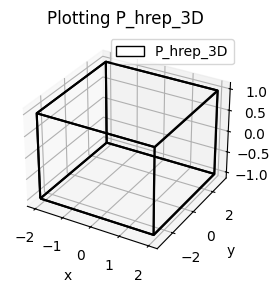

: 

: 

: 

In [ ]:
ax, _, _ = P_hrep_3D.plot(patch_args={"label": "P_hrep_3D"})
ax.legend()
ax.set_title("Plotting P_hrep_3D")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
print("Is P_hrep_3D in V-Rep?", P_hrep_3D.in_V_rep)
print("Is P_hrep_3D in H-Rep?", P_hrep_3D.in_H_rep)

<a name="hreptovrep"></a>

#### Explicit computation of vertex representation from a H-Rep

We can compute the vertices of a polytope in H-Rep using `cdd`. While the conversion can be triggered by a call
`P_hrep.determine_V_rep()`, it can be implicitly achieved by getting `V`. The polytope does not have vertices identified
before such a call (`P_hrep.in_V_rep` is false). However, after the call `P_hrep.V`, `P_hrep.in_V_rep` becomes `True`,
as expected.

Polytope in R^2 in only H-Rep
	In H-rep: 3 inequalities and no equality constraints
Is P_hrep in V-Rep? False
What are the vertices of P_hrep?
 [[0. 0.]
 [2. 0.]
 [0. 2.]]
Is P_hrep in V-Rep? True


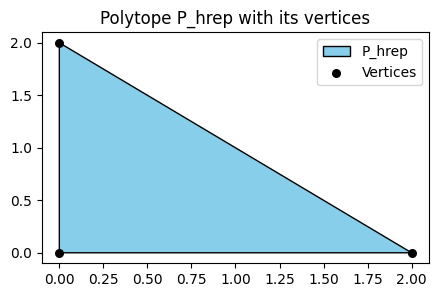

: 

: 

: 

In [ ]:
A_hrep = [[-1, 0], [0, -1], [1, 1]]
b_hrep = (0, 0, 2)  # b as a tuple is also ok
P_hrep = Polytope(A=A_hrep, b=b_hrep)
print(repr(P_hrep))
print("Is P_hrep in V-Rep?", P_hrep.in_V_rep)
# Vertex-halfspace enumeration
vertices_of_P_hrep = P_hrep.V
print("What are the vertices of P_hrep?\n", vertices_of_P_hrep)
print("Is P_hrep in V-Rep?", P_hrep.in_V_rep)
# Visual confirmation
ax, _, _ = P_hrep.plot(
    patch_args={"label": "P_hrep"},
    vertex_args={"visible": True, "label": "Vertices"},
)
ax.legend()
ax.set_title("Polytope P_hrep with its vertices");

<a name="vrep"></a>

### Vertex representation

We now define the same polytope as above in V-Rep, and confirm that it is the same as `P_hrep` defined above.

In [ ]:
theta_vec = np.arange(0, stop=2 * np.pi, step=2 * np.pi / 5)
P_vrep = Polytope(
    V=[[np.cos(theta), np.sin(theta)] for theta in theta_vec]
)
print(repr(P_vrep))
print("Is P_vrep in V-Rep?", P_vrep.in_V_rep)
print("Is P_vrep in H-Rep?", P_vrep.in_H_rep)

: 

: 

: 

<a name="plotvrep"></a>

#### Plotting a V-Rep polytope

We also perform a visual confirmation of the polytopes.

In [ ]:
ax, _, _ = P_vrep.plot(
    patch_args={"label": "P_vrep"},
    vertex_args={"visible": True, "label": "P_vrep.V"},
)
ax.legend()
ax.set_title("Polytope P_vrep with its vertices");

: 

: 

: 

<a name="vreptohrep"></a>

#### Explicit computation of halfspace representation from a V-Rep

We can obtain the halfspace representation of `P_vrep` using `pycvxset`. For ease of visualization, we normalize the H-Rep of `P_vrep`. While the conversion can be triggered by a call `P_vrep.determine_H_rep()`, it can be implicitly achieved by getting `(A,b)`. After the call, we see that `P_vrep` has both H-Rep and V-Rep.

In [ ]:
print(
    "What is the halfspace representation of P_vrep?\nA:\n",
    P_vrep.A,
    "\nb:\n",
    P_vrep.b,
)
print("Is P_vrep in V-Rep?", P_vrep.in_V_rep)
print("Is P_vrep in H-Rep?", P_vrep.in_H_rep)

: 

: 

: 

<a name="normalize"></a>

##### Normalize the H-Rep representation

We can also have the H-Rep normalized so that each row of A has unit $\ell_2$-norm.

In [ ]:
P_vrep.normalize()
print(
    "What is the (normalized) halfspace representation of P_vrep?\nA:\n",
    P_vrep.A,
    "\nb:\n",
    P_vrep.b,
)

: 

: 

: 

<a name="cuboid"></a>

### Axis-aligned cuboids

Next, we define an axis-aligned cuboid using the bounds. Internally, `pycvxset` stores the polytope in H-representation.
One can also define an axis-aligned cuboid based on their center and half-sides.

In [ ]:
axis_aligned_cuboid_from_bounds = Polytope(lb=[-1, 2], ub=[5, 4])
print(repr(axis_aligned_cuboid_from_bounds))
print(
    "What are the vertices of the polytope?\n",
    axis_aligned_cuboid_from_bounds.V,
)
# Plot axis_aligned_cuboid_from_bounds
ax, _, _ = axis_aligned_cuboid_from_bounds.plot(
    patch_args={"label": "Rectangle"}, vertex_args={"visible": True}
)

axis_aligned_cuboid_from_center_and_sides = Polytope(c=[0, 0], h=1)
print(repr(axis_aligned_cuboid_from_center_and_sides))
print(
    "What are the vertices of the polytope?\n",
    axis_aligned_cuboid_from_center_and_sides.V,
)
# Plot axis_aligned_cuboid_from_center_and_sides
axis_aligned_cuboid_from_center_and_sides.plot(
    ax=ax,
    patch_args={"label": "Cube", "facecolor": "m"},
    vertex_args={"visible": True},
)
ax.set_aspect("equal")
ax.legend(loc="best")
ax.set_title("Axis-aligned cuboids");

: 

: 

: 

<a name="empty"></a>

### Empty polytope (and checking for emptiness)

We can also define an empty polytope of desired dimension as well. `pycvxset` can also check if a polytope is empty or 
nonempty.

In [2]:
empty_polytope = Polytope(dim=3)
print(empty_polytope)
print("Is empty_polytope in V-Rep?", empty_polytope.in_V_rep)
print("Is empty_polytope in H-Rep?", empty_polytope.in_H_rep)
print("Is empty_polytope empty?", empty_polytope.is_empty)

Polytope (empty) in R^3
Is empty_polytope in V-Rep? False
Is empty_polytope in H-Rep? False
Is empty_polytope empty? True


We also confirm if previously defined polytopes were not empty.

In [3]:
print("Was P_hrep empty?", P_hrep.is_empty)
print("Was P_vrep empty?", P_vrep.is_empty)

NameError: name 'P_hrep' is not defined

<a name="embed"></a>

### Embedded polytopes

We can also embed a lower-dimensional polytope in a higher-dimensional space. 
1. In V-Rep polytopes, embedded polytopes are characterized by vertices that lie on one or more hyperplanes.
2. In H-Rep polytopes, embedded polytopes are characterized by equality constraints.

Recall that the lower-dimensionality of the polytope is captured by its affine dimension, which `pycvxset` computes automatically.

In [ ]:
low_dim_P_in_high_dim_space = Polytope(V=[[0.5, 1], [1, 2]])
print(low_dim_P_in_high_dim_space)
print(
    "What is low_dim_P_in_high_dim_space's dimension?",
    low_dim_P_in_high_dim_space.dim,
)
print(
    "Is low_dim_P_in_high_dim_space full-dimensional?",
    low_dim_P_in_high_dim_space.is_full_dimensional,
)
print("Is P_hrep full-dimensional?", P_hrep.is_full_dimensional)

print(
    "What is the halfspace representation of P_vrep?\nA:\n",
    low_dim_P_in_high_dim_space.A,
    "\nb:\n",
    low_dim_P_in_high_dim_space.b,
)
ax, _, _ = low_dim_P_in_high_dim_space.plot()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title(r"An interval in $\mathbb{R}^2$")

# Slicing a 3D polytope
print("Is P_hrep_3D full-dimensional?", P_hrep_3D.is_full_dimensional)
equality_constrained_P_hrep_3D = Polytope(
    A=P_hrep_3D.A, b=P_hrep_3D.b, Ae=[0.03, 0, 0.2], be=[0]
)
print(
    "What is equality_constrained_P_hrep_3D's dimension?",
    equality_constrained_P_hrep_3D.dim,
)
print(
    "Is equality_constrained_P_hrep_3D full-dimensional?",
    equality_constrained_P_hrep_3D.is_full_dimensional,
)
ax, _, _ = P_hrep_3D.plot(
    patch_args={
        "alpha": 0.4,
        "facecolor": "lightblue",
        "label": "Original",
    }
)
equality_constrained_P_hrep_3D.plot(
    ax=ax,
    patch_args={
        "facecolor": "lightgreen",
        "label": "Equality constrained",
    },
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend(loc="best", bbox_to_anchor=(1.5, 1))
ax.set_title("Polytope with equality constraints");

: 

: 

: 

<a name="redund"></a>

### Removing redundancies in representation

Given a polytope, we can compute irredundant representations (in H-Rep and V-Rep) using linear programming and `scipy.spatial.ConvexHull`. Also, `minimize_V_rep` and `minimize_H_rep` internally can call the vertex-halfspace enumerators, when required.

<a name="redundcase1"></a>

#### Case 1: Minimizing halfspace representation

In [ ]:
redundant_hrep_A = np.vstack((A_hrep, A_hrep[2]))
redundant_hrep_b = np.hstack((b_hrep, b_hrep[2]))
P_in_redundant_hrep = Polytope(A=redundant_hrep_A, b=redundant_hrep_b)
print("The (redundant) halfspace representation of P_in_redundant_hrep:")
print("A:\n", P_in_redundant_hrep.A, "\nb:\n", P_in_redundant_hrep.b)
P_in_redundant_hrep.minimize_H_rep()
print("The (irredundant) halfspace representation of P_in_redundant_hrep:")
print("A:\n", P_in_redundant_hrep.A, "\nb:\n", P_in_redundant_hrep.b)

: 

: 

: 

<a name="redundcase2"></a>

#### Case 2: Minimizing vertex representation


In [ ]:
redundant_vrep = np.vstack((vertices_of_P_hrep, vertices_of_P_hrep[-2]))
P_in_redundant_vrep = Polytope(V=redundant_vrep)
print("The (redundant) vertex representation of P_in_redundant_vrep:")
print("V:\n", P_in_redundant_vrep.V)
P_in_redundant_vrep.minimize_V_rep()
print("The (irredundant) vertex representation of P_in_redundant_vrep:")
print("V:\n", P_in_redundant_vrep.V)

: 

: 

: 

<a name="redundcase3"></a>

#### Case 3: Compute irredundant (vertex/halfspace) representation with enumeration

In [ ]:
redundant_hrep_A = np.vstack((A_hrep, A_hrep[2]))
redundant_hrep_b = np.hstack((b_hrep, b_hrep[2]))
P_in_redundant_hrep = Polytope(A=redundant_hrep_A, b=redundant_hrep_b)
print("The (redundant) halfspace representation of P_in_redundant_hrep:")
print("A:\n", P_in_redundant_hrep.A, "\nb:\n", P_in_redundant_hrep.b)
print(
    "How many hyperplanes define P_in_redundant_hrep?",
    P_in_redundant_hrep.H.shape[0],
)
print("Is P_in_redundant_hrep in V-Rep?", P_in_redundant_hrep.in_V_rep)
P_in_redundant_hrep.minimize_V_rep()
print("Is P_in_redundant_hrep in H-Rep?", P_in_redundant_hrep.in_H_rep)
print(
    "After calling minimize_V_rep, how many hyperplanes define P_in_redundant_hrep?",
    P_in_redundant_hrep.H.shape[0],
)
P_in_redundant_hrep.minimize_H_rep()
print(
    "After calling minimize_H_rep, how many hyperplanes define P_in_redundant_hrep?",
    P_in_redundant_hrep.H.shape[0],
)
print("The (irredundant) halfspace representation of P_in_redundant_hrep:")
print("A:\n", P_in_redundant_hrep.A, "\nb:\n", P_in_redundant_hrep.b)

: 

: 

: 

<a name="autoscale"></a>

### Plotting with autoscale

We also see the benefit of autoscale_enable being set to `True` (default).

In [ ]:
P_hrep = Polytope(A=A_hrep, b=b_hrep)
fig, ax = plt.subplots(1, 2)
ax[0].set_xlim([-5, 5])
P_hrep.plot(ax=ax[0])
ax[0].set_title("autoscale_enable=True")
ax[1].set_xlim([-5, 5])
P_hrep.plot(ax=ax[1], autoscale_enable=False)
ax[1].set_title("autoscale_enable=False")
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.suptitle("Plotting P_hrep with autoscale_enable");

: 

: 

: 

<a name="onepoly"></a>

## Operations involving a single polytope

We provide examples for the following operations supported by `pycvxset` on the `Polytope` objects.

1. Affine transformation
2. Inverse affine transformation with an invertible linear map
3. Projection of a polytope
4. Project a point on to a polytope
5. Support function computation
6. Chebyshev centering
7. Maximum volume inscribing ellipsoid
8. Minimum volume circumscribing ellipsoid
9. Minimum volume circumscribing rectangle
10. Containment: Check if a point is in a polytope
11. Volume computation
12. Interior point computation

For polytope transformations, we will use `OLD_POLYTOPE_COLOR_1` to denote the old polytope and `NEW_POLYTOPE_COLOR` to denote the new polytope.

In [ ]:
OLD_POLYTOPE_COLOR_1 = "skyblue"
NEW_POLYTOPE_COLOR = "lightgray"

: 

: 

: 

<a name="affine"></a>

### Affine transformation

Affine transformations of polytopes can rotate, shear, and translate polytopes.

Recall that rotation matrix $R(\theta)=\left[\begin{array}{cc}\cos(\theta)&-\sin(\theta)\\\sin(\theta)&\cos(\theta)\end{array}\right]$ rotates a 2D vector by $\theta\in(-\pi,\pi]$. Thus, given a 2D polytope $\mathcal{P}$, we are interested in computing the polytope $$\mathcal{Q}=R(\theta)\mathcal{P} + \left[\begin{array}{c} 2\\-2\end{array}\right].$$

Note that the `Polytope` class overloads the operator `@` and `+` to accomplish these transformations. Alternatively, you can use `affine_map` and `plus` methods.

In [ ]:
OLD_POLYTOPE_1 = Polytope(V=[[0, 0], [0, 1], [2, 0]])
rotation_degree = 45
rotation_radians = np.deg2rad(rotation_degree)
rotation_matrix = np.array(
    [
        [np.cos(rotation_radians), -np.sin(rotation_radians)],
        [np.sin(rotation_radians), np.cos(rotation_radians)],
    ]
)
translation = np.array([[2, -2]]).T
# Computation via operator overloading
new_polytope_from_affine_transformation = (
    rotation_matrix @ OLD_POLYTOPE_1 + translation
)

patch_args_old = {
    "facecolor": OLD_POLYTOPE_COLOR_1,
    "label": "Original polytope",
}
patch_args_new = {
    "facecolor": NEW_POLYTOPE_COLOR,
    "label": "Affine transformed polytope",
}
ax, _, _ = OLD_POLYTOPE_1.plot(patch_args=patch_args_old)
new_polytope_from_affine_transformation.plot(
    ax=ax, patch_args=patch_args_new
)
ax.legend()
ax.set_title("Affine transformation")

# Explicit computation via methods
new_polytope_from_affine_transformation_explicit = (
    OLD_POLYTOPE_1.affine_map(rotation_matrix).plus(translation)
)
print(
    "Are polytopes obtained from these methods the same?",
    new_polytope_from_affine_transformation
    == new_polytope_from_affine_transformation_explicit,
)

: 

: 

: 

In [ ]:
patch_args_old = {
    "facecolor": OLD_POLYTOPE_COLOR_1,
    "label": "Original polytope",
}
patch_args_new = {
    "facecolor": NEW_POLYTOPE_COLOR,
    "label": "Affine transformed polytope",
}
P = Polytope(V=spread_points_on_a_unit_sphere(2, 7)[0])
new_P = [[2, 0], [0, 0.5]] @ P
ax, _, _ = P.plot(patch_args=patch_args_old)
new_P.plot(ax=ax, patch_args=dict(patch_args_new, **{"alpha": 0.5}))
ax.legend(loc="lower right", bbox_to_anchor=(1, 0))
ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Grow in x, but shrink in y");

: 

: 

: 

<a name="negation"></a>

#### Negation and scaling by a scalar

In [ ]:
negated_P = -P
scaled_P = 0.2 * P
ax = P.plot(
    patch_args={
        "alpha": 0.4,
        "facecolor": OLD_POLYTOPE_COLOR_1,
        "label": "Original",
    }
)[0]
negated_P.plot(
    ax=ax,
    patch_args={
        "alpha": 0.4,
        "facecolor": NEW_POLYTOPE_COLOR,
        "label": "-P",
    },
)
scaled_P.plot(
    ax=ax,
    patch_args={"alpha": 0.4, "facecolor": "lightgreen", "label": "0.2P"},
)
ax.legend()

: 

: 

: 

<a name="invaffine"></a>

### Inverse affine transformation

We can also undo an affine transformation when it is invertible.

Note that the `Polytope` class overloads the operator `@` and `-` to accomplish these transformations. Alternatively, you can use `inverse_affine_map` and `minus` methods.

We use `==` to check if polytopes are equal. For more details, see containment.

In [ ]:
old_polytope_from_new_polytope = (
    new_polytope_from_affine_transformation - translation
) @ rotation_matrix
old_polytope_from_new_polytope_explicit = (
    new_polytope_from_affine_transformation.minus(
        translation
    ).inverse_affine_map_under_invertible_matrix(rotation_matrix)
)
print(
    "Are polytopes obtained from these methods the same?",
    old_polytope_from_new_polytope_explicit
    == old_polytope_from_new_polytope,
)
print(
    "Did we get the old polytope back?",
    old_polytope_from_new_polytope_explicit == OLD_POLYTOPE_1,
)

patch_args_new = {
    "facecolor": OLD_POLYTOPE_COLOR_1,
    "label": "Affine transformed polytope",
}
patch_args_new_undo = {
    "facecolor": NEW_POLYTOPE_COLOR,
    "label": "Undo the affine transformation",
}
ax, _, _ = new_polytope_from_affine_transformation.plot(
    patch_args=patch_args_new
)
old_polytope_from_new_polytope_explicit.plot(
    ax=ax, patch_args=patch_args_new_undo
)
ax.legend()
ax.set_title("Inverse affine transformation");

: 

: 

: 

<a name="projection"></a>

### Projection of a polytope

Given a polytope $\mathcal{P}\subset\mathbb{R}^n$, the (orthogonal) projection of a polytopes is defined as $$\mathcal{R} = \{r \in \mathbb{R}^{m}: \exists v \in \mathbb{R}^{n - m},\ \mathrm{Lift}(r,v)\in \mathcal{P}\}$$
Here, $m = \mathcal{P}.dim - \text{length}(\text{project\_away\_dimensions})$, and $\mathrm{Lift}(r,v)$ lifts (undoes the projection) by combining $r$ and $v$ to produce a $n$-dimensional vector.

You can rotate the 3D plots using your mouse.

**WARNING**: You will see issues with matplotlib's rendering when you rotate the figure (see the second plot). See https://matplotlib.org/stable/api/toolkits/mplot3d/faq.html#my-3d-plot-doesn-t-look-right-at-certain-viewing-angles for more details. When a visual comparison of the plots is desired, it may be better to just plot the frame by setting `patch_args['facecolor]=None`. This issue does not appear for 2D plotting.

In [ ]:
L1_norm_ball = Polytope(V=np.vstack((np.eye(3), -np.eye(3))))
simplex_in_R_pos = Polytope(V=np.vstack((np.eye(3), [0, 0, 0])))
polytope_list = [L1_norm_ball, simplex_in_R_pos, simplex_in_R_pos]
view_dict = [
    {"elev": 21, "azim": -120},
    {"elev": 21, "azim": -35},
    {"elev": 21, "azim": -35},
]
facecolor_3d_list = ["lightblue", "lightblue", None]
for P, view_dict, facecolor_3d in zip(
    polytope_list, view_dict, facecolor_3d_list
):
    fig = plt.figure()
    ax = fig.add_subplot(1, 2, 1, projection="3d")
    ax.view_init(**view_dict)
    P.plot(ax=ax, patch_args={"facecolor": facecolor_3d})
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_aspect("equal")
    ax.set_title("3D polytope")
    P_projection = P.projection(project_away_dim=2)
    ax2d = fig.add_subplot(1, 2, 2)
    P_projection.plot(ax=ax2d)
    ax2d.set_xlabel("x")
    ax2d.set_ylabel("y")
    ax2d.set_aspect("equal")
    ax2d.set_title("Projection on x-y")
    plt.subplots_adjust(wspace=1)

: 

: 

: 

<a name="projectpoint"></a>

### Project a point on to a polytope

Given a polytope $\mathcal{P}\subset\mathbb{R}^n$ and a point $y\in\mathbb{R}^n$, the projection of the point on to $\mathcal{P}$ is defined as the optimal solution to the optimization problem $x^\ast = \arg\inf_{x\in\mathcal{P}} \|x - y\|_2$.

The `Polytope` class also provides `closest_point` and `distance` methods that are wrapper to `project` method. Projection can also be computed using `1` and `inf` norms.

In [ ]:
L1_norm_ball = Polytope(V=np.vstack((np.eye(2), -np.eye(2))))
point_to_project = np.array([1, 0.5])
projected_point, distance_to_polytope = L1_norm_ball.project(
    point_to_project
)
print(
    f"Distance of point to project {np.array2string(point_to_project)} "
    f"to the polytope: {distance_to_polytope[0]:1.2f}"
)
print(
    "Did closest_point return the same point?",
    np.allclose(
        projected_point, L1_norm_ball.closest_point(point_to_project)
    ),
)
print(
    "Did distance return the same distance?",
    np.allclose(
        distance_to_polytope, L1_norm_ball.distance(point_to_project)
    ),
)

patch_args = {"facecolor": OLD_POLYTOPE_COLOR_1, "label": "L1 norm ball"}
ax, _, _ = L1_norm_ball.plot(patch_args=patch_args)
ax.scatter(
    point_to_project[0],
    point_to_project[1],
    color="red",
    label="Point to project",
)
ax.scatter(
    projected_point[0, 0],
    projected_point[0, 1],
    color="k",
    label="Projected point",
)
ax.plot(
    [point_to_project[0], projected_point[0, 0]],
    [point_to_project[1], projected_point[0, 1]],
    "k--",
    label="Distance",
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_aspect("equal")
ax.grid()
plt.subplots_adjust(right=0.7)
ax.set_title("Projection of a point on a polytope");

: 

: 

: 

<a name="containmentpoint"></a>

### Containment: Check if a point is in a polytope

Given a polytope $\mathcal{P}\subset\mathbb{R}^n$ and a point $y\in\mathbb{R}^n$,  we can check if $y\in\mathcal{P}$.

The `Polytope` class also overloads `in`, `<`, `<=` operator for this purpose.

In [ ]:
L1_norm_ball = Polytope(V=np.vstack((np.eye(2), -np.eye(2))))
point_to_project = np.array([1, 0.5])
projected_point = L1_norm_ball.closest_point(point_to_project)
print(
    "Does the unit l1-norm ball contain point_to_project? "
    f"{L1_norm_ball.contains(point_to_project)}"
)
print(
    "Is point_to_project in the unit l1-norm ball? "
    f"{point_to_project in L1_norm_ball}"
)
print(
    "Is point_to_project <= the unit l1-norm ball? "
    f"{point_to_project <= L1_norm_ball}"
)
print(
    "Is point_to_project < the unit l1-norm ball? "
    f"{point_to_project < L1_norm_ball}"
)

print(
    "\nDoes the unit l1-norm ball contain projected_point? "
    f"{L1_norm_ball.contains(projected_point)}"
)
print(
    "Is projected_point in the unit l1-norm ball? "
    f"{projected_point in L1_norm_ball}"
)
print(
    "Is projected_point <= the unit l1-norm ball? "
    f"{projected_point <= L1_norm_ball}"
)
print(
    "Is projected_point < the unit l1-norm ball? "
    f"{projected_point < L1_norm_ball}"
)

: 

: 

: 

<a name="support"></a>

### Support function

Given a polytope $\mathcal{P}\subset\mathbb{R}^n$ and a vector $\eta\in\mathbb{R}^n$, the support function of the polytope is defined as $\rho_{\mathcal{P}}=\sup_{x\in\mathcal{P}} \eta^\top x$, and its optimal solution as the support vector.
Recall that $$\mathcal{P}\subset\{x:\eta^\top x \leq \rho_{\mathcal{P}}(\eta)\}$$ for any direction $\eta\in\mathbb{R}^n$.

The `Polytope` class also provides `extreme` as a wrapper method to the `support` method to directly compute the support vectors.

In [ ]:
P = np.diag([0.5, 0.75]) @ Polytope(
    V=spread_points_on_a_unit_sphere(2, 7)[0]
)
direction_vectors = np.array([[0, -1], [0, 1], [1, 0.5], [-2.5, -1]])
support_evaluations, support_points = P.support(direction_vectors)

outer_approximating_polytope = Polytope(
    A=direction_vectors, b=support_evaluations
)
ax, _, _ = P.plot(
    patch_args={"facecolor": "lightgreen", "label": "Polytope"}
)
outer_approx_patch_args = {
    "facecolor": "lightblue",
    "alpha": 0.4,
    "label": "Outer-approx. polytope",
}
outer_approximating_polytope.plot(
    ax=ax, patch_args=outer_approx_patch_args
)
ax.scatter(
    support_points[:, 0],
    support_points[:, 1],
    color="red",
    label="Support points",
)
ax.set_aspect("equal")
ax.grid()
ax.legend(bbox_to_anchor=(0.8, 1))
plt.subplots_adjust(right=0.6)
print(
    "Did the extreme function return the same support points?",
    np.allclose(P.extreme(direction_vectors), support_points),
)
ax.set_title("Support function/vector evaluation");

: 

: 

: 

<a name="cheby"></a>

### Chebyshev centering

Given a polytope $\mathcal{P}\subset\mathbb{R}^n$, the Chebyshev center $c$ is the "deepest" point within the polytope. Specifically, $(c, R)$ is the optimal solution to the robust linear program $\sup_{\mathrm{Ball}(x, r)\subset\mathcal{P}} r$, where $\mathrm{Ball}(x, r)$ is a $n$-dimensional ball centered at $x\in\mathbb{R}^n$ with radius $r$.

In [ ]:
P = np.diag([1.5, 1.25]) @ Polytope(V=[[0, 0], [1, 0], [0, 2]])
c, r = P.chebyshev_centering()
print(f"The Chebyshev center of the polytope is: {np.array2string(c)}")
print(f"The Chebyshev radius of the polytope is: {r:1.2f}")

P_patch_args = {"facecolor": "lightgreen", "label": "Polytope"}
ax, _, _ = P.plot(patch_args=P_patch_args)
chebyshev_ball = Ellipsoid(c, r=r)
chebyshev_ball_patch_args = {
    "facecolor": "lightblue",
    "label": "Chebyshev ball",
}
chebyshev_ball.plot(ax=ax, patch_args=chebyshev_ball_patch_args)
ax.scatter(c[0], c[1], color="red", label="Chebyshev center")
ax.set_aspect("equal")
ax.grid()
ax.legend(bbox_to_anchor=(0.8, 1))
plt.subplots_adjust(right=0.6)
ax.set_title("Chebyshev centering");

: 

: 

: 

<a name="mvie"></a>

### Maximum volume inscribing ellipsoid

Given a polytope $\mathcal{P}\subset\mathbb{R}^n$, we now compute the maximum volume ellipsoid that is completely contained within the polytope. Recall that ellipsoids are parameterized by their center and a shape matrix $(c, Q)$, i.e., $\mathcal{E}(c, Q)=\{x| {(x - c)}^\top Q^{-1} (x-c) \leq 1 \}$. 

We compute the ellipsoid by solving the following convex program $\sup_{\mathcal{E}(c, Q)\subset\mathcal{P}} \mathrm{Vol}(\mathcal{E}(c,Q))$, when $\mathcal{P}$ has a halfspace-representation. 

Note that Chebyshev centering discussed above can be viewed as the maximum volume inscribing sphere (instead of ellipsoid).


In [ ]:
P = np.diag([1.5, 1.25]) @ Polytope(V=[[0, 0], [1, 0], [0, 2]])
c, Q, _ = P.maximum_volume_inscribing_ellipsoid()
max_vol_insc_ell = Ellipsoid(c, Q=Q)
print(f"Ellipsoid center is: {np.array2string(c)}")
print(f"Ellipsoid shape matrix is:\n{np.array2string(Q)}")
print(f"Ellipsoid volume is: {max_vol_insc_ell.volume():1.2f}")

P_patch_args = {"facecolor": "lightgreen", "label": "Polytope"}
ax, _, _ = P.plot(patch_args=P_patch_args)
max_vol_insc_ell_patch_args = {
    "facecolor": "lightblue",
    "label": "Max. vol. ellipsoid",
}
max_vol_insc_ell.plot(ax=ax, patch_args=max_vol_insc_ell_patch_args)
ax.scatter(c[0], c[1], color="red", label="Ellipsoid center")
ax.set_aspect("equal")
ax.grid()
ax.legend(bbox_to_anchor=(0.8, 1))
plt.subplots_adjust(right=0.6)
ax.set_title("Maximum volume inscribing ellipsoid");

: 

: 

: 

<a name="mvce"></a>

### Minimum volume circumscribing ellipsoid

Given a polytope $\mathcal{P}\subset\mathbb{R}^n$, we now compute the minimum volume ellipsoid that completely covers the polytope. 

We compute the ellipsoid by solving the following convex program $\inf_{\mathcal{P}\subseteq\mathcal{E}(c, Q)} \mathrm{Vol}(\mathcal{E}(c,Q))$, when $\mathcal{P}$ has a vertex-representation. 

In [ ]:
P = np.diag([1.5, 1.25]) @ Polytope(V=[[0, 0], [1, 0], [0, 2]])
c, Q, _ = P.minimum_volume_circumscribing_ellipsoid()
min_vol_circ_ell = Ellipsoid(c, Q=Q)
print(f"Ellipsoid center is: {np.array2string(c)}")
print(f"Ellipsoid shape matrix is:\n{np.array2string(Q)}")
print(f"Ellipsoid volume is: {min_vol_circ_ell.volume():1.2f}")

P_patch_args = {"facecolor": "lightgreen"}
min_vol_circ_ell_patch_args = {"facecolor": "lightblue"}
ax, hE, _ = min_vol_circ_ell.plot(patch_args=min_vol_circ_ell_patch_args)
_, hP, _ = P.plot(ax=ax, patch_args=P_patch_args)
hs = ax.scatter(c[0], c[1], color="red")
ax.set_aspect("equal")
ax.grid()
ax.legend(
    [hP, hE, hs],
    ["Polytope", "Min. vol. ellipsoid", "Ellipsoid center"],
    bbox_to_anchor=(0.8, 1),
)
plt.subplots_adjust(right=0.6)
ax.set_title("Minimum volume circumscribing ellipsoid");

: 

: 

: 

<a name="mvcr"></a>

### Minimum volume circumscribing rectangle

Given a polytope $\mathcal{P}\subset\mathbb{R}^n$, we now compute the minimum volume rectangle that completely covers the polytope. Recall that rectangles are parameterized by their lower and upper bounds $(l, u)$, i.e., $\mathcal{R}(l, u)=\{x| l \leq x \leq u \}$.

We compute the ellipsoid by solving the following optimization problem $\inf_{\mathcal{P}\subseteq\mathcal{R}(l, u)} \mathrm{Vol}(\mathcal{R}(l,u))$. This optimization problem can be solved via linear programming. 

In [ ]:
P = (
    rotation_matrix
    @ np.diag([1.5, 1.25])
    @ Polytope(V=[[0, 0], [1, 0], [0, 2]])
)
l, u = P.minimum_volume_circumscribing_rectangle()
min_vol_circ_rect = Polytope(lb=l, ub=u)
print(f"Rectangle lower bound is: {np.array2string(l)}")
print(f"Rectangle upper bound is: {np.array2string(u)}")
print(f"Rectangle volume is: {min_vol_circ_rect.volume():1.2f}")

P_patch_args = {"facecolor": "lightgreen"}
min_vol_circ_rect_patch_args = {"facecolor": "lightblue"}
ax, hE, _ = min_vol_circ_rect.plot(patch_args=min_vol_circ_rect_patch_args)
_, hP, _ = P.plot(ax=ax, patch_args=P_patch_args)
ax.set_aspect("equal")
ax.grid()
ax.legend(
    [hP, hE], ["Polytope", "Min. vol. rectangle"], bbox_to_anchor=(1, 0.75)
)
plt.subplots_adjust(right=0.6)
ax.set_title("Minimum volume circumscribing rectangle");

: 

: 

: 

<a name="interior"></a>

### Interior point computation

In [ ]:
P = np.diag([2, 0.75]) @ Polytope(
    V=spread_points_on_a_unit_sphere(2, 7)[0]
)
chebyshev_center = P.interior_point(point_type="chebyshev")
centroid = P.interior_point(point_type="centroid")
ax, _, _ = P.plot(
    patch_args={"facecolor": "lightgreen", "label": "Polytope"}
)
ax.scatter(
    chebyshev_center[0],
    chebyshev_center[1],
    color="red",
    label="Chebyshev center",
)
ax.scatter(centroid[0], centroid[1], color="k", label="Centroid")
ax.set_aspect("equal")
ax.grid()
ax.legend(loc="lower right", bbox_to_anchor=(1.2, 0))
plt.subplots_adjust(right=0.8)
ax.set_title("Support function/vector evaluation");

: 

: 

: 

<a name="volume"></a>

### Volume computation

We can `scipy.spatial.ConvexHull` to compute the volume of a polytope.

We perform a simple sanity check where we compute the volume a unit l1-norm ball. From the figures above, it is evident that the "rhombus" consists of four isosceles right angled triangles with base as $1$.

In [ ]:
L1_norm_ball = Polytope(V=np.vstack((np.eye(2), -np.eye(2))))
volume_of_an_isosceles_triangle_with_unit_base = 0.5
volume_of_unit_l1_norm_ball = L1_norm_ball.volume()
print(
    "Is the volume of the unit l1-norm ball 2?",
    np.isclose(
        volume_of_unit_l1_norm_ball,
        4 * volume_of_an_isosceles_triangle_with_unit_base,
    ),
)

: 

: 

: 

<a name="cartesian"></a>

### Cartesian product with itself

In [ ]:
cartesian_P = Polytope(lb=[-1, -1], ub=[1, 1])
cartesian_P_4D = cartesian_P**2
print(
    "Is cartesian_P_4D a cuboid?",
    cartesian_P_4D == Polytope(c=[0, 0, 0, 0], h=1),
)

: 

: 

: 

<a name="twopoly"></a>

## Operations involving two polytopes

In [ ]:
OLD_POLYTOPE_2 = Polytope(c=[0, 0], h=2) + [-2, 4]
OLD_POLYTOPE_COLOR_2 = "lightsalmon"

: 

: 

: 

<a name="minkowski"></a>

### Minkowski sum

We perform a Minkowski sum operation on two polytopes. Specifically, given two polytopes
$\mathcal{P}_1$ and $\mathcal{P}_2$, we compute 
$$\mathcal{Q}=\{p_1+p_2\ |\ p_1\in\mathcal{P}_1,p_2\in\mathcal{P}_2\}.$$

**Sanity check:** The convex hull of the polytopes obtained by translating 
$\mathcal{P}_1$ to $\mathcal{P}_2$'s vertices coincides with $\mathcal{Q}$.

**Note:** This code snippet also shows the advantage of obtaining handles. In line 15, if label is passed to patch_args, we would have as many legend entries as the number of vertices in `OLD_POLYTOPE_2.V`.

In [ ]:
new_polytope = OLD_POLYTOPE_1 + OLD_POLYTOPE_2

fig, ax = plt.subplots(1, 2)
OLD_POLYTOPE_1.plot(
    ax=ax[0], patch_args={"facecolor": OLD_POLYTOPE_COLOR_1, "label": "P1"}
)
OLD_POLYTOPE_2.plot(
    ax=ax[0],
    patch_args={
        "zorder": 10,
        "facecolor": OLD_POLYTOPE_COLOR_2,
        "label": "P2",
    },
)
new_polytope.plot(
    ax=ax[0], patch_args={"facecolor": NEW_POLYTOPE_COLOR, "label": "Q"}
)
ax[0].legend(loc="best")
ax[0].set_title("Minkowski sum Q = P1 $\oplus$ P2")

OLD_POLYTOPE_1.plot(
    ax=ax[1], patch_args={"facecolor": OLD_POLYTOPE_COLOR_1}
)
new_polytope.plot(
    ax=ax[1],
    patch_args={
        "facecolor": NEW_POLYTOPE_COLOR,
        "alpha": 0.9,
        "label": r"Q=P1 $\oplus$ P2.v",
    },
)
OLD_POLYTOPE_2.plot(
    ax=ax[1],
    patch_args={"facecolor": OLD_POLYTOPE_COLOR_2, "alpha": 0.2},
    vertex_args={"s": 50, "color": "r"},
)
for v in OLD_POLYTOPE_2.V:
    temp_polytope = v + OLD_POLYTOPE_1
    _, h, _ = temp_polytope.plot(
        ax=ax[1], patch_args={"facecolor": "k", "alpha": 0.8}
    )
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend([*handles, h], [*labels, "P2.v"], loc="best")
ax[1].set_title("Sanity check");

: 

: 

: 

<a name="pontryagin"></a>

### Pontryagin difference

We perform a Pontryagin difference operation on two polytopes. Specifically, given two 
polytopes $\mathcal{P}_1$ and $\mathcal{P}_2$, we compute 
$$\mathcal{Q}=\mathcal{P}_2 \ominus \mathcal{P}_1 = \{p_2\ |\ \{p_2\} \oplus \mathcal{P}_1 \subseteq\mathcal{P}_2\} = \{p_2\ |\ \forall p_1 \in\mathcal{P}_1,\  p_1 + p_2 \in\mathcal{P}_2\}.$$

**Sanity check:** 1) $\mathcal{Q}\subseteq \mathcal{P}_2$, and 2) Translating $\mathcal{P}_1$ by 
$\mathcal{Q}$'s vertices still keeps it inside $\mathcal{P}_2$.

In [ ]:
NEW_POLYTOPE = OLD_POLYTOPE_2 - OLD_POLYTOPE_1

fig, ax = plt.subplots(1, 2)
OLD_POLYTOPE_1.plot(
    ax=ax[0], patch_args={"facecolor": OLD_POLYTOPE_COLOR_1, "label": "P1"}
)
OLD_POLYTOPE_2.plot(
    ax=ax[0], patch_args={"facecolor": OLD_POLYTOPE_COLOR_2, "label": "P2"}
)
NEW_POLYTOPE.plot(
    ax=ax[0],
    patch_args={
        "facecolor": NEW_POLYTOPE_COLOR,
        "label": r"Q=P2 $\ominus$ P1",
    },
)
ax[0].legend(loc="best")
ax[0].set_title("Pontryagin difference")

OLD_POLYTOPE_2.plot(
    ax=ax[1], patch_args={"facecolor": OLD_POLYTOPE_COLOR_2}
)
NEW_POLYTOPE.plot(
    ax=ax[1],
    vertex_args={"visible": True, "color": "r", "s": 50, "label": "Q.v"},
    patch_args={"facecolor": NEW_POLYTOPE_COLOR},
)
for v in NEW_POLYTOPE.V:
    temp_polytope = v + OLD_POLYTOPE_1
    _, h, _ = temp_polytope.plot(
        ax=ax[1], patch_args={"facecolor": "k", "alpha": 0.8}
    )
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend([*handles, h], [*labels, r"P1 $\oplus$ Q.v"], loc="best")
ax[1].set_title("Sanity check");

: 

: 

: 

<a name="intersection"></a>

### Intersection

We perform an intersection operation on two polytopes. Specifically, given two polytopes
$\mathcal{P}_1$ and $\mathcal{P}_2$, we compute 
$$\mathcal{Q}=\{p\ |\ p\in\mathcal{P}_1,p\in\mathcal{P}_2\}.$$

To obtain a non-empty intersection, we first translate $\mathcal{P}_1$ to obtain $\mathcal{P}_1^\dagger$.

**Sanity check:** Defining $\mathcal{Q}=\mathcal{P}_1^\dagger\cap\mathcal{P}_2$, we have 1) $\mathcal{Q}\subseteq\mathcal{P}_1^\dagger$ and 2) $\mathcal{Q}\subseteq\mathcal{P}_2$.

You can also compute intersection with affine sets, halfspaces, as well as intersections with other polytopes under an inverse-affine maps.

In [ ]:
translate_by_vector = (-1, 3)
P4 = OLD_POLYTOPE_1 + translate_by_vector
new_polytope = OLD_POLYTOPE_2.intersection(P4)

fig = plt.figure()
ax = plt.gca()
OLD_POLYTOPE_1.plot(
    ax=ax, patch_args={"facecolor": OLD_POLYTOPE_COLOR_1, "label": "P1"}
)
OLD_POLYTOPE_2.plot(
    ax=ax, patch_args={"facecolor": OLD_POLYTOPE_COLOR_2, "label": "P2"}
)
P4.plot(
    ax=ax,
    patch_args={
        "facecolor": "yellow",
        "linewidth": 3,
        "label": r"P1$^\dagger$",
    },
)
new_polytope.plot(
    ax=ax,
    patch_args={
        "edgecolor": NEW_POLYTOPE_COLOR,
        "fill": False,
        "linewidth": 1,
        "label": "Q",
    },
)
ax.legend(loc="best")
ax.set_title(r"Intersection Q=P1$^\dagger\cap$ P2");

: 

: 

: 

<a name="intersectioninverse"></a>

#### Intersection under inverse affine map

Given polytopes $\mathcal{P}=\{x|-1\leq x \leq 1\}\subset\mathbb{R}^3$ and $\mathcal{Q}=\{x|-1\leq x - 1\leq 1\}\subset\mathbb{R}^2$ and matrix $R=[I_2, 0_{2\times 1}]$, we compute $\mathcal{P}\cap_R\mathcal{Q}=\{x\in\mathcal{P}|Rx\in\mathcal{Q}\}=\{x|-1\leq x \leq 1, [I_2, 0_{2\times 1}]x\in\mathcal{Q}\}=\{x|-1\leq x \leq 1, 0\leq x_i \leq 2\text{ for }i\in\{1,2\}\}$. Unlike $\mathcal{P}\cap(\mathcal{Q}@R)$, this function does not require $R$ to be square.

In [ ]:
P_3D = Polytope(c=[0, 0, 0], h=1)
ax, _, _ = P_3D.plot(patch_args={"label": "P_3D"})
P_3D.intersection_under_inverse_affine_map(
    Polytope(c=[1, 1], h=1), [[1, 0, 0], [0, 1, 0]]
).plot(
    ax=ax,
    patch_args={"facecolor": "yellow", "label": "P_3D after intersection"},
)
ax.legend()
ax.view_init(elev=15, azim=-24)
ax.set_title("Intersection with a halfspace")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z");

: 

: 

: 

<a name="halfspace"></a>

#### Intersection with a halfspace

In [ ]:
ax, _, _ = P_3D.plot(patch_args={"label": "P_3D"})
P_3D.intersection_with_halfspaces(A=[1, 1, 1], b=0).plot(
    ax=ax,
    patch_args={"facecolor": "yellow", "label": "P_3D after intersection"},
)
ax.legend()
ax.view_init(elev=15, azim=-24)
ax.set_title("Intersection with a halfspace")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z");

: 

: 

: 

<a name="affineset"></a>

#### Intersection with an affine set    

In [ ]:
ax, _, _ = P_3D.plot(patch_args={"label": "P_3D"})
print("Before intersection: He shape", P_3D.He.shape)
P_3D_intersection = P_3D.intersection_with_affine_set(Ae=[1, 1, 1], be=0)
P_3D_intersection.plot(
    ax=ax,
    patch_args={"facecolor": "yellow", "label": "P_3D after intersection"},
)
print("After intersection: He shape", P_3D_intersection.He.shape)
ax.legend()
ax.view_init(elev=15, azim=-24)
ax.set_title("Intersection with affine set")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z");

: 

: 

: 

<a name="slice"></a>

#### Slice

In [ ]:
ax, _, _ = P_3D.plot(patch_args={"label": "P_3D"})
P_3D.slice(dims=2, constants=0.5).plot(
    ax=ax,
    patch_args={"facecolor": "yellow", "label": "P_3D after slicing"},
)
ax.legend()
ax.view_init(elev=15, azim=-24)
ax.set_title("Slicing")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z");

: 

: 

: 

<a name="containment"></a>

### Containment and equality check

We can see if a polytope covers another --- given two polytopes
$\mathcal{P}_1$ and $\mathcal{P}_2$, we can check if $\mathcal{P}_1\overset{?}{\subseteq}\mathcal{P}_2$. `pycvxset` provides a method `contains` to do so, but also overloads binary operators `<=`, `<`, `>=`, `>`, `in` for the same. Finally, we can also check if polytopes are equal using `==`.

You can also check the polytope contains another ellipsoid or a constrained zonotope as well.

In [ ]:
P5 = 0.5 * (
    OLD_POLYTOPE_1 - OLD_POLYTOPE_1.interior_point("centroid")
) + OLD_POLYTOPE_1.interior_point("centroid")
fig, ax = plt.subplots(1, 2)
OLD_POLYTOPE_1.plot(
    ax=ax[0], patch_args={"facecolor": OLD_POLYTOPE_COLOR_1, "label": "P1"}
)
P5.plot(ax=ax[0], patch_args={"facecolor": "black", "label": "P5"})
ax[0].legend(loc="best")
print(f"Does P1 cover P5? {OLD_POLYTOPE_1.contains(P5)}")
print(f"Is P1 >= P5? {OLD_POLYTOPE_1 >= P5}")
print(f"Is P1 > P5? {OLD_POLYTOPE_1 > P5}")
print(f"Is P5 in P1? {P5 in OLD_POLYTOPE_1}")
print(f"Is P1 <= P5? {OLD_POLYTOPE_1 <= P5}")
print(f"Is P1 < P5? {OLD_POLYTOPE_1 < P5}")
print(f"Is P1 in P5? {OLD_POLYTOPE_1 in P5}")
OLD_POLYTOPE_2.plot(
    ax=ax[1], patch_args={"facecolor": OLD_POLYTOPE_COLOR_2, "label": "P2"}
)
P4.plot(ax=ax[1], patch_args={"facecolor": "grey", "label": "P4"})
ax[1].legend(loc="best")
print(f"\n\nDoes P2 cover P4? {OLD_POLYTOPE_2.contains(P4)}")
print(f"Is P2 >= P4? {OLD_POLYTOPE_2 >= P4}")
print(f"Is P2 > P4? {OLD_POLYTOPE_2 > P4}")
print(f"Is P4 in P2? {P4 in OLD_POLYTOPE_2}")
print(f"Is P2 <= P4? {OLD_POLYTOPE_2 <= P4}")
print(f"Is P2 < P4? {OLD_POLYTOPE_2 < P4}")
print(f"Is P2 in P4? {OLD_POLYTOPE_2 in P4}")
plt.suptitle("Containment check for two sets of polytopes");

: 

: 

: 